# Model Training

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

C:\Users\cmehb\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('data/stud.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data['gender'] = data['gender'].map({'female':0, 'male':1})
data['parental_level_of_education'] = data['parental_level_of_education'].map({'some high school':0,'high school':1,
                                                                               'some college':2,"associate's degree":3,
                                                                               "bachelor's degree":4, "master's degree":5})
data['test_preparation_course'] = data['test_preparation_course'].map({'none':0, 'completed':1})
data['lunch'] = data['lunch'].map({'standard':1, 'free/reduced':0})
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,0,group B,4,1,0,72,72,74
1,0,group C,2,1,1,69,90,88
2,0,group B,5,1,0,90,95,93
3,1,group A,3,0,0,47,57,44
4,1,group C,2,1,0,76,78,75


In [5]:
data = pd.get_dummies(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   parental_level_of_education  1000 non-null   int64
 2   lunch                        1000 non-null   int64
 3   test_preparation_course      1000 non-null   int64
 4   math_score                   1000 non-null   int64
 5   reading_score                1000 non-null   int64
 6   writing_score                1000 non-null   int64
 7   race_ethnicity_group A       1000 non-null   uint8
 8   race_ethnicity_group B       1000 non-null   uint8
 9   race_ethnicity_group C       1000 non-null   uint8
 10  race_ethnicity_group D       1000 non-null   uint8
 11  race_ethnicity_group E       1000 non-null   uint8
dtypes: int64(7), uint8(5)
memory usage: 59.7 KB


## Modelling Preparation

### Splitting data to features and target

In [6]:
X=data.drop(['math_score'],axis=1)
y=data['math_score']
print(f'Features shape: {X.shape}')
print(f'Target shape:{y.shape}')

Features shape: (1000, 11)
Target shape:(1000,)


### Splitting data to test and train set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
print(f'X_train shape is : {X_train.shape}')
print(f'X_test shape is : {X_test.shape}')
print(f'y_train shape is : {y_train.shape}')
print(f'y_test shape is : {y_test.shape}')

X_train shape is : (800, 11)
X_test shape is : (200, 11)
y_train shape is : (800,)
y_test shape is : (200,)


### Model Requirements

In [8]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [9]:
def evaluate(model):
    y_train_pred = model.predict(X_train)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r_sq = r2_score(y_train, y_train_pred)
    print('Model performance for Training set')
    print(f"- Root Mean Squared Error is {train_rmse}")
    print(f"- Mean Absolute Error is {train_mae}")
    print(f"- R squared error is {train_r_sq}")
    print('----------------------------------')
    
    y_test_pred = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r_sq = r2_score(y_test, y_test_pred)
    print('Model performance for Test set')
    print(f"- Root Mean Squared Error is {test_rmse}")
    print(f"- Mean Absolute Error is {test_mae}")
    print(f"- R squared error is {test_r_sq}")
    
    print('='*35)
    print('\n')
    return(test_r_sq)

In [10]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
#from xgboost import XGBRegressor
#from catboost import CatBoostRegressor

In [11]:
# "XGBRegressor": XGBRegressor(),
# "CatBoosting Regressor": CatBoostRegressor(verbose=False)
models = {"Linear Regression": LinearRegression(),
          "Lasso": Lasso(),
          "Ridge": Ridge(),
          "K-Neighbours Regressor" : KNeighborsRegressor(),
          "Decision Tree": DecisionTreeRegressor(),
          "Support Vector Machine": SVR(),
          "Random Forest Regressor": RandomForestRegressor(),
          "AdaBoost Regressor":AdaBoostRegressor()
          }

In [12]:
model_list =[]
r2_list = []
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    model_name = list(models.keys())[i]
    model_list.append(model_name)
    print(f"{model_name}\n")
    test_r_sq = evaluate(model)
    r2_list.append(test_r_sq)


Linear Regression

Model performance for Training set
- Root Mean Squared Error is 5.337022942627443
- Mean Absolute Error is 4.280355358943515
- R squared error is 0.8736565467932157
----------------------------------
Model performance for Test set
- Root Mean Squared Error is 5.36852461704637
- Mean Absolute Error is 4.181966418321511
- R squared error is 0.8815597679452447


Lasso

Model performance for Training set
- Root Mean Squared Error is 6.475697447233418
- Mean Absolute Error is 5.112987635007527
- R squared error is 0.8139936790435942
----------------------------------
Model performance for Test set
- Root Mean Squared Error is 6.363193353294296
- Mean Absolute Error is 5.016963801443908
- R squared error is 0.8336052606107022


Ridge

Model performance for Training set
- Root Mean Squared Error is 5.337184714164109
- Mean Absolute Error is 4.279877919930658
- R squared error is 0.8736488874353473
----------------------------------
Model performance for Test set
- Root Mean

In [13]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
0,Linear Regression,0.881560
2,Ridge,0.881538
7,AdaBoost Regressor,0.851497
6,Random Forest Regressor,0.847340
1,Lasso,0.833605
4,Decision Tree,0.743772
3,K-Neighbours Regressor,0.670398
5,Support Vector Machine,0.621603


### Model Selection

In [14]:
linear_model = LinearRegression(fit_intercept = True)
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy of the model is {score}")

Accuracy of the model is 88.15597679452448


In [15]:
### Plot beween actual and predicted values

Text(0, 0.5, 'Predicted')

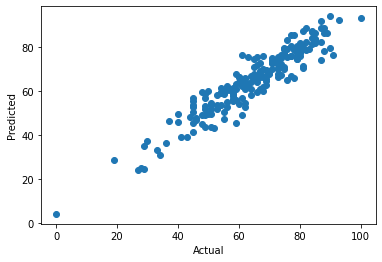

In [16]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [17]:
### Regression plot


<AxesSubplot:xlabel='math_score'>

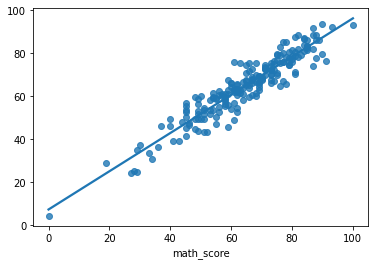

In [18]:
sns.regplot(x=y_test,y=y_pred,ci=None)

In [19]:
### Difference between actual and predicted values

In [20]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.385804,14.614196
737,53,58.255761,-5.255761
740,80,77.288737,2.711263
660,74,76.288104,-2.288104
411,84,87.053863,-3.053863
...,...,...,...
408,52,43.278105,8.721895
332,62,62.175947,-0.175947
208,74,67.246283,6.753717
613,65,67.025548,-2.025548
